## Downloading data

In [1]:
import os
data_dir = '../data'
if not os.path.isdir(data_dir):
    os.mkdir(data_dir)

fname = data_dir+"/2_telco_customer_churn.csv"
if not os.path.exists(fname):
    !wget -O $fname "https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv"

## Importing modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#this is to set the style of our plots on seaborn
sns.set(style='ticks', context='notebook', palette='deep')
#sns.set_palette("BuGn_r")

## Data exploration

In [3]:
df = pd.read_csv(fname)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce') 

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Data exploration

<Figure size 432x288 with 0 Axes>

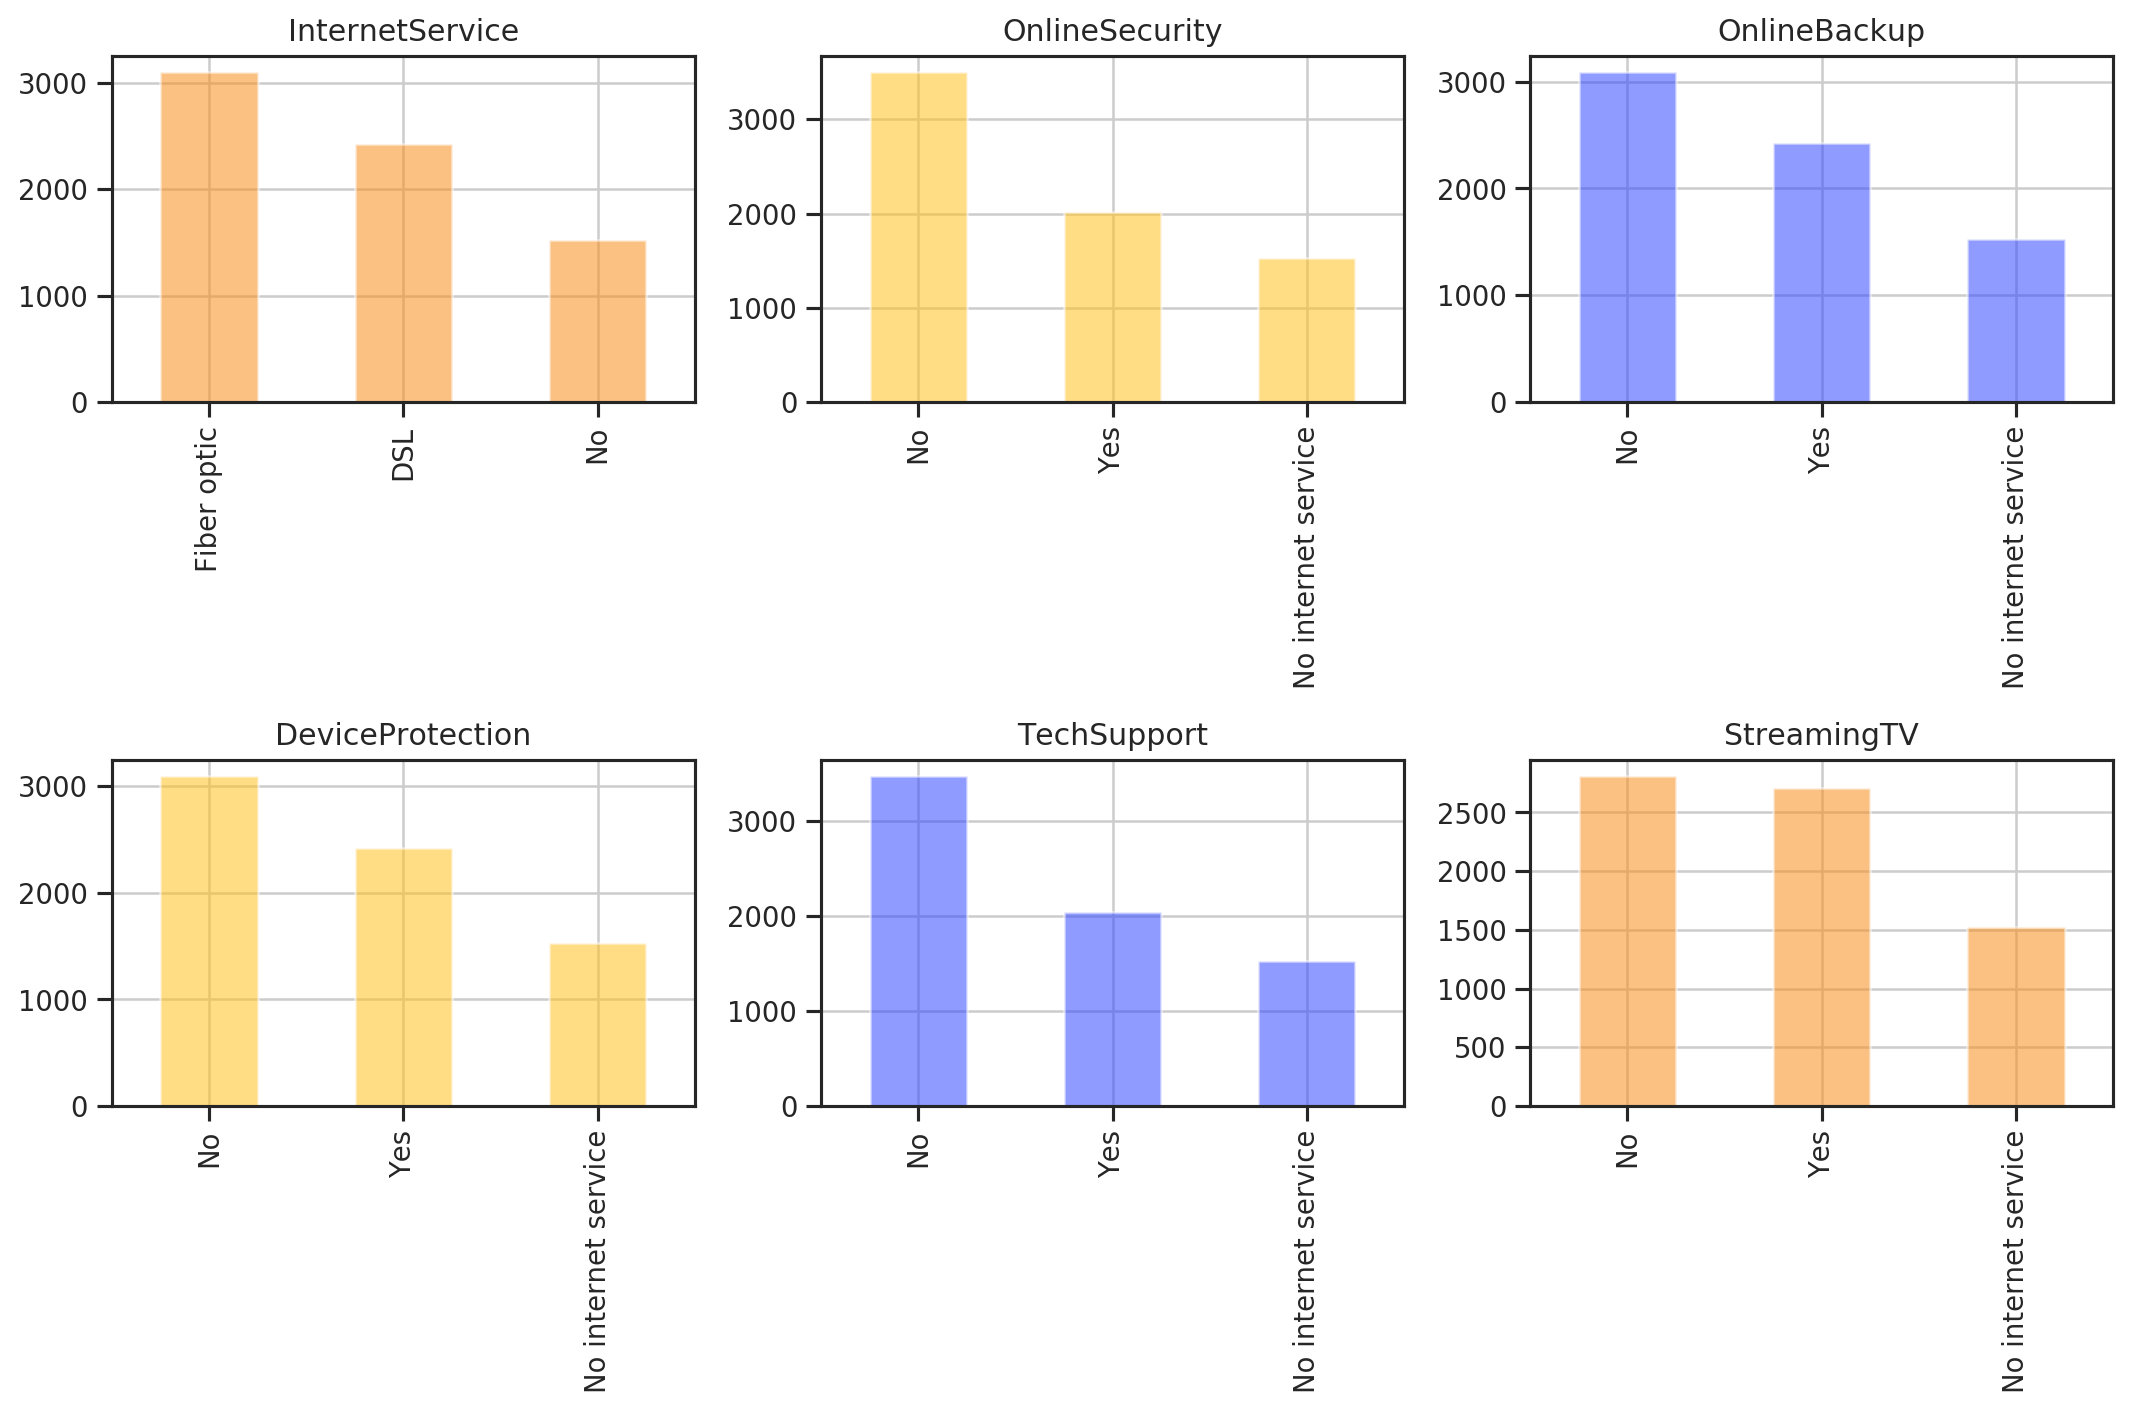

In [8]:
plt.clf()
def plot_hitograms(df, fields, colors, ncol,nrow):
    fig=plt.figure(dpi = 180, figsize=(12,8))
    for i,var_name in enumerate(fields):
        ax=fig.add_subplot(nrow,ncol,i+1)
        df[var_name].value_counts().plot(kind="bar",ax=ax,color =colors[i],alpha =0.55)
        ax.set_title(var_name)
        ax.grid()
    fig.tight_layout()  # Improves appearance a bit.
    
    plt.show()
    
plot_hitograms(df,fields = ["InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV"],
               colors = ['#F78F1E','#FFC222','#3349FF','#FFC222','#3349FF','#F78F1E','#FFC222'],
               ncol = 3,
               nrow = 2)

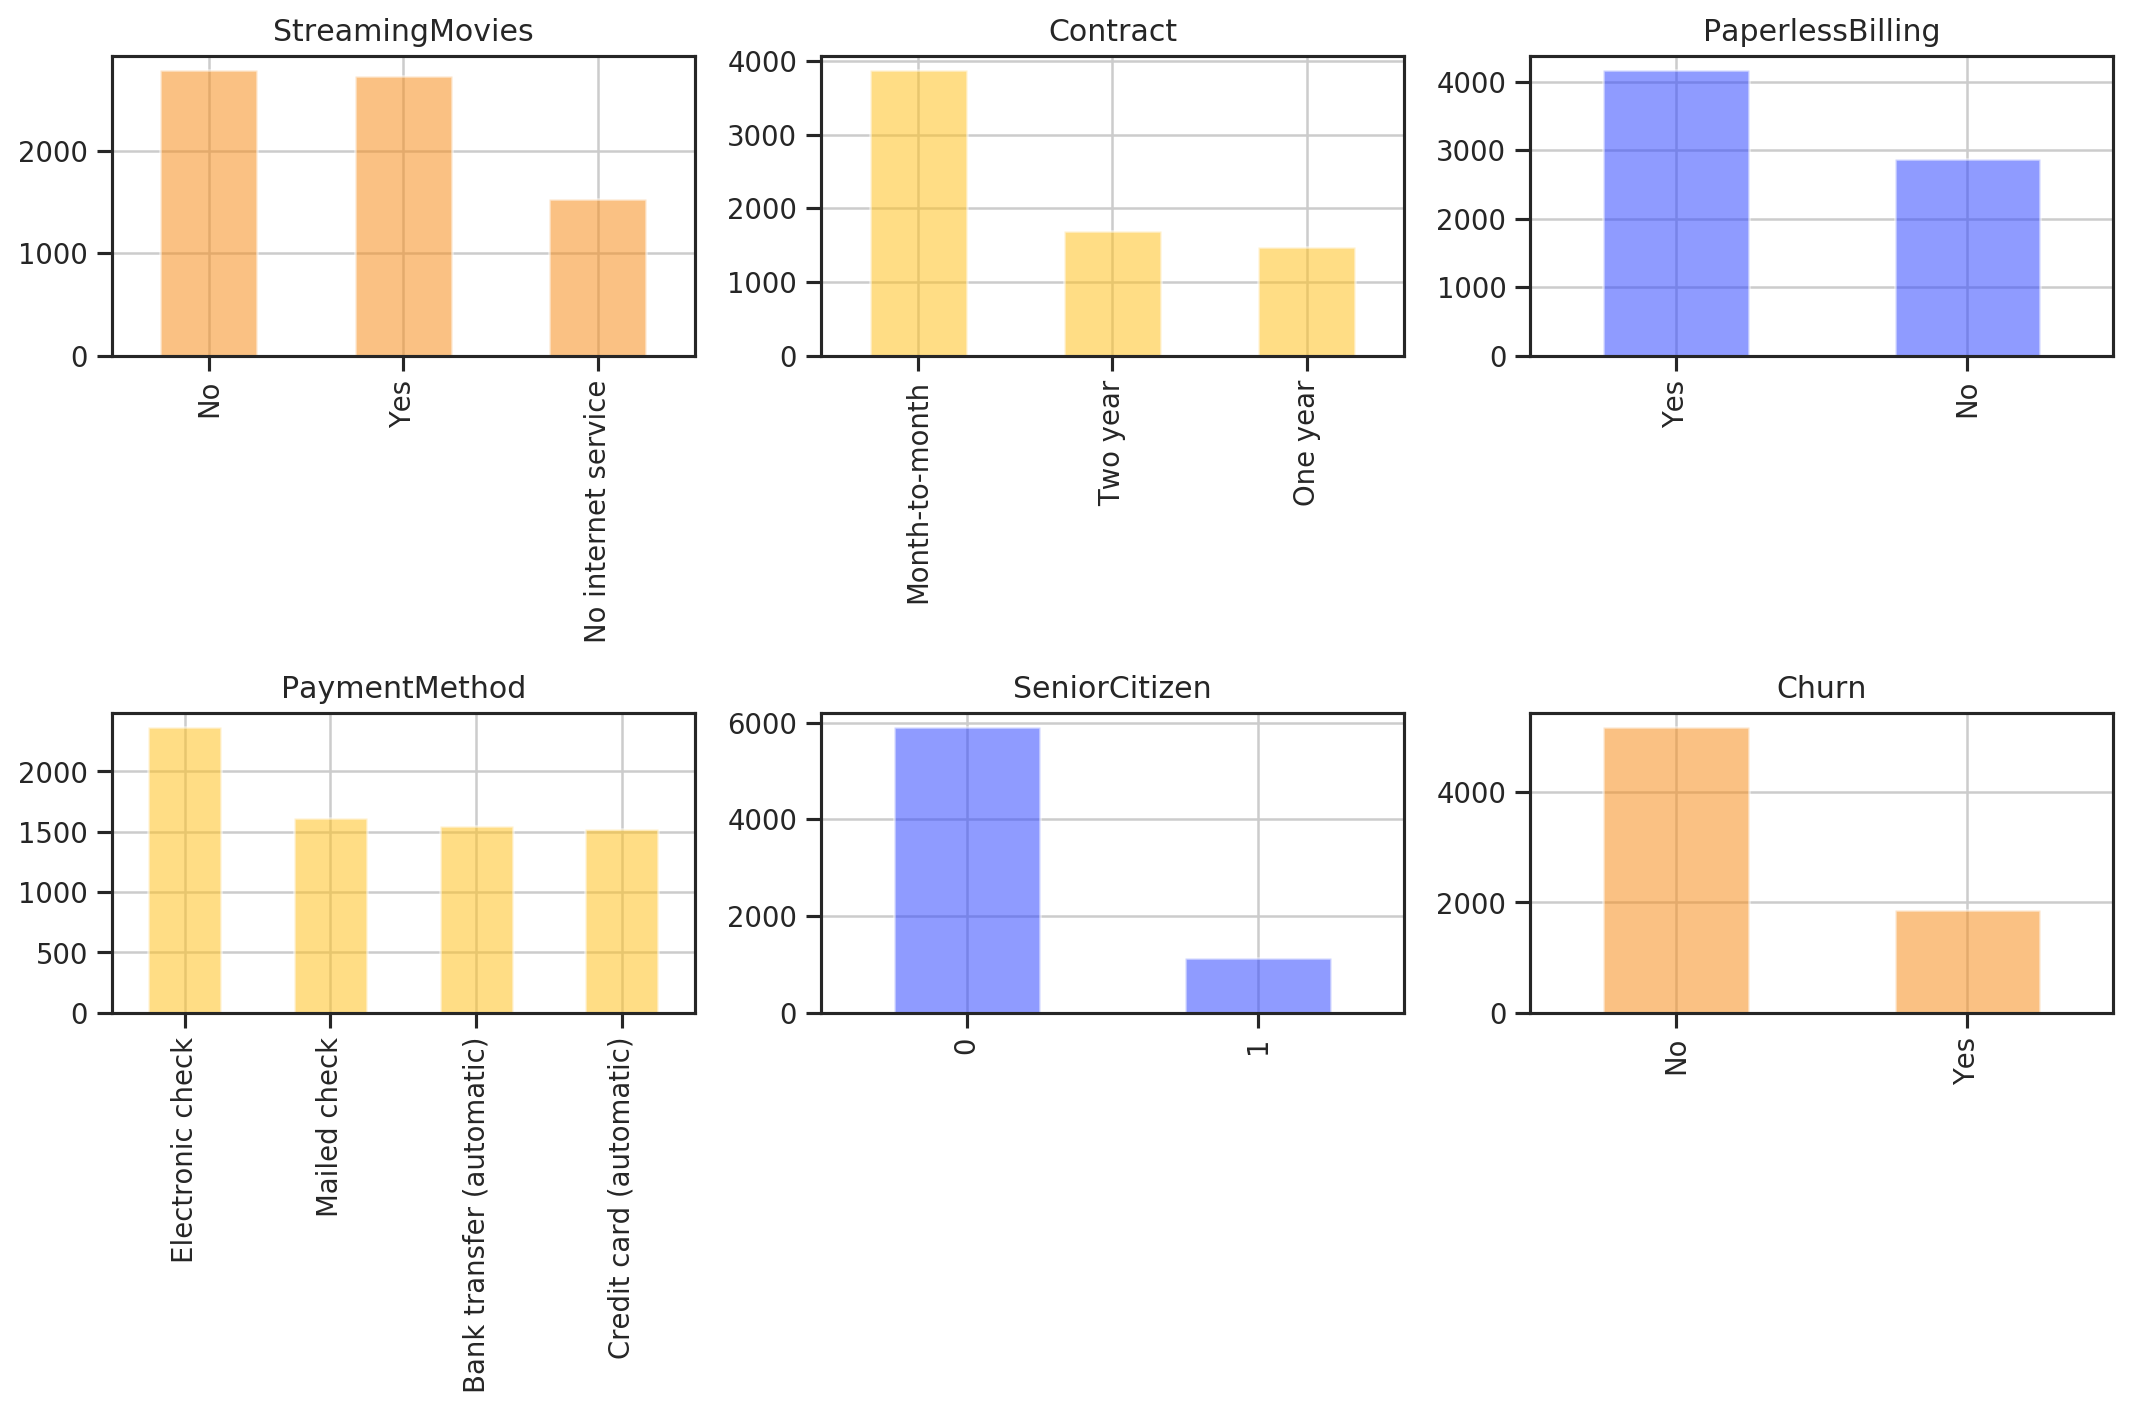

In [9]:
plot_hitograms(df,fields = ["StreamingMovies","Contract","PaperlessBilling","PaymentMethod","SeniorCitizen","Churn"],
               colors = ['#F78F1E','#FFC222','#3349FF','#FFC222','#3349FF','#F78F1E','#FFC222'],
               ncol = 3,
               nrow = 2)

We see very little churn. All the other variables are quite spread but there are some insights on the whole data. People in general prefer to pay monthly, users have 0.5 probability of watching or not watching movies or Tv. They also prefer fiber optic for their internet connection. Those are general trends of the whole population.

Let's now analise the numerical features, first tenure distribution. This is, the number of months the user has stayed in the company

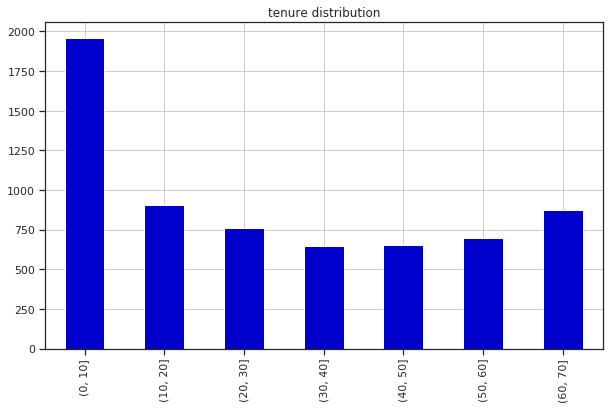

In [10]:
bins = list(range(0,75,10))
group_names = list(map(str,bins))
tmp = df.copy()
tmp['tenure_bin'] = pd.cut(tmp['tenure'], bins)

plt.clf()
plt.title("tenure distribution")
tmp.tenure_bin.value_counts().sort_index().plot(kind = "bar",
                                             color = '#0000CD',
                                             figsize = (10,6),
                                             grid = True)
plt.show()

Now see what people spends on the montly bill in dollars

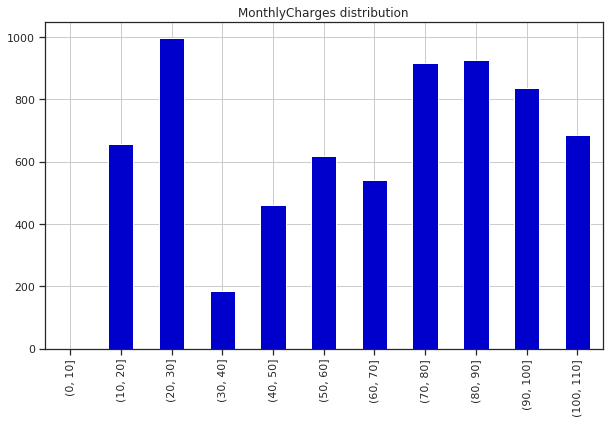

In [11]:
bins = list(range(0,120,10))
group_names = list(map(str,bins))
tmp = df.copy()
tmp['MonthlyCharges_bin'] = pd.cut(tmp['MonthlyCharges'], bins)

plt.clf()
plt.title("MonthlyCharges distribution")
tmp.MonthlyCharges_bin.value_counts().sort_index().plot(kind = "bar",
                                             color = '#0000CD',
                                             figsize = (10,6),
                                             grid = True)
plt.show()

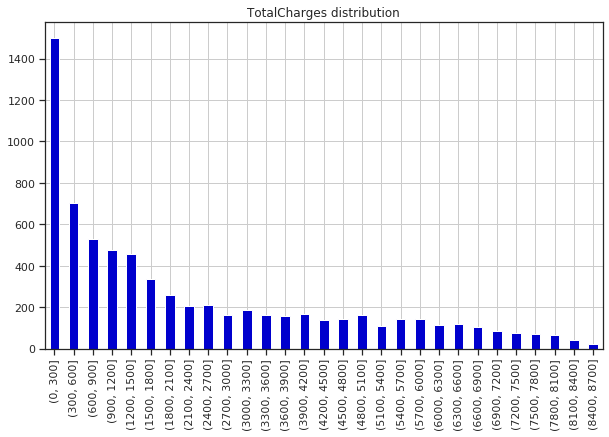

In [12]:
bins = list(range(0,9000,300))
group_names = list(map(str,bins))
tmp = df.copy()
tmp['TotalCharges_bin'] = pd.cut(tmp['TotalCharges'], bins)

plt.clf()
plt.title("TotalCharges distribution")
tmp.TotalCharges_bin.value_counts().sort_index().plot(kind = "bar",
                                             color = '#0000CD',
                                             figsize = (10,6),
                                             grid = True)
plt.show()

Finally see, that generally the total charges are small (between 0 and 300 dollars). 

## Encoding the info

There are lots of variables, many of them are binary, so I'm going to encode them into 1 or 0.

In [14]:
object_columns = list(df.loc[:, df.dtypes == object].columns)
print(object_columns)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [15]:
for i, colname in enumerate(object_columns):
    print(f"{colname} = {df.loc[:, object_columns[i]].unique()[0:10]}...")

customerID = ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU']...
gender = ['Female' 'Male']...
Partner = ['Yes' 'No']...
Dependents = ['No' 'Yes']...
PhoneService = ['No' 'Yes']...
MultipleLines = ['No phone service' 'No' 'Yes']...
InternetService = ['DSL' 'Fiber optic' 'No']...
OnlineSecurity = ['No' 'Yes' 'No internet service']...
OnlineBackup = ['Yes' 'No' 'No internet service']...
DeviceProtection = ['No' 'Yes' 'No internet service']...
TechSupport = ['No' 'Yes' 'No internet service']...
StreamingTV = ['No' 'Yes' 'No internet service']...
StreamingMovies = ['No' 'Yes' 'No internet service']...
Contract = ['Month-to-month' 'One year' 'Two year']...
PaperlessBilling = ['Yes' 'No']...
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']...
Churn = ['No' 'Yes']...


In [16]:
df["gender"] = df["gender"].apply(lambda x: 1 if x=='Male' else 0)
df["Partner"] = df["Partner"].apply(lambda x: 1 if x=='Yes' else 0)
df["Dependents"] = df["Dependents"].apply(lambda x: 1 if x=='Yes' else 0)
df["PhoneService"] = df["PhoneService"].apply(lambda x: 1 if x=='Yes' else 0)
#df["MultipleLines"] = df["MultipleLines"].apply(lambda x: 1 if x=='Yes' else (0 if x=="No" else np.nan))
df["PaperlessBilling"] = df["PaperlessBilling"].apply(lambda x: 1 if x=='Yes' else 0)
df["Churn"] = df["Churn"].apply(lambda x: 1 if x=='Yes' else 0)

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [18]:
object_columns = list(df.loc[:, df.dtypes == object].columns)

# deleting the customerID
object_columns = [col for col in object_columns if col not in ["customerID"]]
object_columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [22]:
df_ml = df.copy()
encoded = pd.get_dummies(df_ml.loc[:,object_columns])

other_cols = [col for col in df.columns if col not in list(object_columns)+["customerID"]]

df_ml = pd.concat([df_ml.loc[:,other_cols],encoded],axis = 1)
#df_ml.head()

df_ml.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [23]:
df_ml.shape

(7043, 41)

In [25]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
gender                                     7043 non-null int64
SeniorCitizen                              7043 non-null int64
Partner                                    7043 non-null int64
Dependents                                 7043 non-null int64
tenure                                     7043 non-null int64
PhoneService                               7043 non-null int64
PaperlessBilling                           7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7032 non-null float64
Churn                                      7043 non-null int64
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null uint8
MultipleLines_Yes                          7043 non-null uint8
InternetService_DSL                        7043 non-null uint8
Interne

Are there nulls?

In [43]:
df_ml.isnull().values.any()

True

How many in the entire dataframe?

In [45]:
df_ml.isnull().sum().sum()

11

Which columns?

In [47]:
for col in df_ml.columns:
    print(f"{col} number of nulls {df_ml[col].isnull().sum()}")

gender number of nulls 0
SeniorCitizen number of nulls 0
Partner number of nulls 0
Dependents number of nulls 0
tenure number of nulls 0
PhoneService number of nulls 0
PaperlessBilling number of nulls 0
MonthlyCharges number of nulls 0
TotalCharges number of nulls 11
Churn number of nulls 0
MultipleLines_No number of nulls 0
MultipleLines_No phone service number of nulls 0
MultipleLines_Yes number of nulls 0
InternetService_DSL number of nulls 0
InternetService_Fiber optic number of nulls 0
InternetService_No number of nulls 0
OnlineSecurity_No number of nulls 0
OnlineSecurity_No internet service number of nulls 0
OnlineSecurity_Yes number of nulls 0
OnlineBackup_No number of nulls 0
OnlineBackup_No internet service number of nulls 0
OnlineBackup_Yes number of nulls 0
DeviceProtection_No number of nulls 0
DeviceProtection_No internet service number of nulls 0
DeviceProtection_Yes number of nulls 0
TechSupport_No number of nulls 0
TechSupport_No internet service number of nulls 0
TechSu

There are 11 nulls con column TotalCharges, I just remove those

In [59]:
df_ml = df_ml.loc[df_ml["TotalCharges"].notnull(),:]
df_ml.shape

(7032, 41)

## Variable selection

There are many variables in the datasaset once we have one hot encoded. We have to find the most relevant ones for our prediction. We will use step backward selection with 10 variables.

In [60]:
features = df_ml.loc[:, [col for col in df_ml.columns if col not in ["Churn"]]]
target = df_ml["Churn"]

print(features.shape)
print(target.shape)

(7032, 40)
(7032,)


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=0)

In [66]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

max_features = 10

model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)
selector = RFE(model, max_features, step=1, verbose=0)

selector = selector.fit(X_train.values, y_train.values)
selected_features = X_train.loc[:, selector.support_].columns.values.tolist()

p_selected_features = ',\n'.join(selected_features)
print(f"The {max_features} variables that predict the best are: \n\n{p_selected_features}")

The 10 variables that predict the best are: 

gender,
tenure,
PaperlessBilling,
MonthlyCharges,
TotalCharges,
InternetService_Fiber optic,
OnlineSecurity_No,
TechSupport_No,
Contract_Month-to-month,
PaymentMethod_Electronic check


In [69]:
selector.support_

array([ True, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False])

In [70]:
X_train_select = X_train.loc[:, selector.support_]
X_test_select = X_test.loc[:, selector.support_]

## Training a model

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc

logistic = LogisticRegression(random_state=110)
logistic.fit(X_train.values,y_train.values.reshape(-1))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=110, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
#predict on test
y_predicted_logistic = logistic.predict(X_test.values)

conf = confusion_matrix(y_test,y_predicted_logistic)
conf

array([[1525,  175],
       [ 273,  348]])

In [77]:
print("Shape for test prediction == 1 is {}".format(y_test.loc[y_test == 1].shape))
print("Shape for test prediction == 0 is {}".format(y_test.loc[y_test == 0].shape))

Shape for test prediction == 1 is (621,)
Shape for test prediction == 0 is (1700,)


In [78]:
#since this is binary case we can extract directly the tp, fp....
tn, fp, fn, tp = confusion_matrix(y_test,y_predicted_logistic).ravel()

print("tp: {} values are classified positive and are positive".format(tp))
print("tn: {} values are classified negative and are negative".format(tn))
print("fp: {} values predicted as positive but actually were negative".format(fp))
print("fn: {} values predicted as negative but actually were positive".format(fn))

tp: 348 values are classified positive and are positive
tn: 1525 values are classified negative and are negative
fp: 175 values predicted as positive but actually were negative
fn: 273 values predicted as negative but actually were positive


In [79]:
print("Accuracy is correctly_classified/total: {}".format(accuracy_score(y_test,y_predicted_logistic)))

Accuracy is correctly_classified/total: 0.8069797501077122


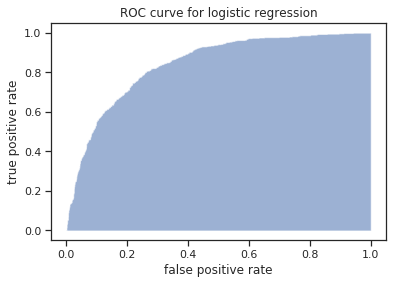

The area under the curve is 0.8451307189542484


In [80]:
scores = logistic.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test,scores)

#now, let's plot it!!

plt.clf() #clear plot
plt.title("ROC curve for logistic regression")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
#plt.plot(fpr,tpr,linewidth=2)
plt.fill_between(fpr,0,tpr, alpha = 0.55)
plt.show()


print("The area under the curve is {}".format(auc(fpr,tpr)))

## Random forest 

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[50,100],
               'max_features': [2,3],
               'max_depth': [4,8,10],
               "criterion": ["gini", "entropy"]}]

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = param_grid,
                           cv = 3,
                           verbose = 5)

grid_search.fit(X_train.values,y_train.values.flatten())

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] criterion=gini, max_depth=4, max_features=2, n_estimators=50 ....
[CV]  criterion=gini, max_depth=4, max_features=2, n_estimators=50, score=0.778, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=2, n_estimators=50 ....
[CV]  criterion=gini, max_depth=4, max_features=2, n_estimators=50, score=0.768, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=2, n_estimators=50 ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=2, n_estimators=50, score=0.771, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=2, n_estimators=100 ...


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=2, n_estimators=100, score=0.771, total=   0.3s
[CV] criterion=gini, max_depth=4, max_features=2, n_estimators=100 ...
[CV]  criterion=gini, max_depth=4, max_features=2, n_estimators=100, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=2, n_estimators=100 ...


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=2, n_estimators=100, score=0.768, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=3, n_estimators=50 ....
[CV]  criterion=gini, max_depth=4, max_features=3, n_estimators=50, score=0.779, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=3, n_estimators=50 ....
[CV]  criterion=gini, max_depth=4, max_features=3, n_estimators=50, score=0.776, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=3, n_estimators=50 ....
[CV]  criterion=gini, max_depth=4, max_features=3, n_estimators=50, score=0.780, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=3, n_estimators=100 ...
[CV]  criterion=gini, max_depth=4, max_features=3, n_estimators=100, score=0.779, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=3, n_estimators=100 ...
[CV]  criterion=gini, max_depth=4, max_features=3, n_estimators=100, score=0.785, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=3, n_estimators=100 ...
[

[CV]  criterion=entropy, max_depth=8, max_features=3, n_estimators=50, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=3, n_estimators=50 .
[CV]  criterion=entropy, max_depth=8, max_features=3, n_estimators=50, score=0.806, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=3, n_estimators=100, score=0.792, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=3, n_estimators=100, score=0.798, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=3, n_estimators=100, score=0.803, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=2, n_estimators=50, score=0.791, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2,

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   11.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [82]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 3, 'n_estimators': 100}

In [83]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)